# Sentence Embeddings using Siamese BERT-Networks
---



## Install Sentence Transformer Library

In [1]:
# Install the library using pip
!pip install sentence-transformers

     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 1.3MB 6.0MB/s 
     |████████████████████████████████| 2.9MB 15.7MB/s 
     |████████████████████████████████| 890kB 30.3MB/s 
     |████████████████████████████████| 1.1MB 36.8MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.9-cp36-none-any.whl size=101036 sha256=0ba403a68f1e52d2924b77b22c8a15413cfd9d38b9275c6aa88ddfdce1754f47
  Stored in directory: /root/.cache/pip/wheels/fc/89/43/f2f5bc00b03ef9724b0f6254a97eaf159a4c4ddc024b33e07a
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=323b0834842b7bf5c549b15a77a3044b81372e4ccb93e38f7dbfc26730a7fd71
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


## Load the BERT Model

In [2]:
from sentence_transformers import SentenceTransformer

# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 
# Semantic Textual Similarity are available https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/sts-models.md

model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:19<00:00, 21.2MB/s]


## Setup a Corpus

In [37]:
# What-is-machine-learning?
sentences_machine_learning = [
                          
  'Suggested: Machine Learning (ML) can be explained as automating and improving the learning process of computers based on their experiences without being actually programmed i.e. without any human assistance. The process starts with feeding good quality data and then training our machines(computers) by building machine learning models using the data and different algorithms. The choice of algorithms depends on what type of data do we have and what kind of task we are trying to automate. Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks. For simple tasks assigned to computers, it is possible to program algorithms telling the machine how to execute all steps required to solve the problem at hand; on the computers part, no learning is needed. For more advanced tasks, it can be challenging for a human to manually create the needed algorithms. In practice, it can turn out to be more effective to help the machine develop its own algorithm, rather than having human programmers specify every needed step.',
   #corrrect
  'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
  'Machine Learning is a sub-area of artificial intelligence, whereby the term refers to the ability of IT systems to independently find solutions to problems by recognizing patterns in databases. In other words: Machine Learning enables IT systems to recognize patterns on the basis of existing algorithms and data sets and to develop adequate solution concepts.',
  'Think of ML as a recipe to learn an algorithm. The recipe is: Learn from past experience of tasks Continue to carry out tasks Raise performance with each experience gained How to raise performance with increasing experience is the algorithm it teaches itself with the help of the recipe. A machine is said to learn if and only if it increases it is performance with each gaining experience',
  'Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention. Because of new computing technologies, machine learning today is not like machine learning of the past. It was born from pattern recognition and the theory that computers can learn without being programmed to perform specific tasks; researchers interested in artificial intelligence wanted to see if computers could learn from data. ',
  'Machine learning invariably refers to a family of mathematical techniques and computational algorithms used to ‘learn’ from ‘data’. There are several terms that deserve an amplification. Data. It’s impossible to provide an axiomatic definition to the term data. The term information may be used as a synonym for data but again, that doesn’t say very much (circular arguments never got me very far.) You may think of data as a spreadsheet, a collection of pictures, audio recording, collection of videos, data residing in bank’s credit-card transactions database, the bytes on your hard-disk and so on.',
  'Machine Learning is actually a game of data. If you can play with data then you can master Machine Learning. For Example, if you have spent your childhood in some city say Kolkata then it must be obvious that you know all the places in Kolkata. Now if someone asks you about places in Kolkata then you will be able to answer him/her with the maximum confidence that you have. Relating this example I can say that the experiences of your childhood was the training process (training data) with which you have learned and the person who was asking you was testing on you (test data) and your answer was checked if it was right or wrong in percentage(accuracy rate).',
  'Is a process of enabling a computer based system to learn to do tasks based on well defined statistical and mathematical methods The ability to do the tasks come from the underlying model which is the result of the learning process. Sometimes the ability comes from an mathematical algorithm The model generated represents behavior of the processes that were earlier performed before machine learning The model is generated from huge volume of data, huge both in breadth and depth reflecting the real world in which the processes are performed The more representative data is of the real world, the better the model would be. The challenge is how to make it a true representative',
  'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
  'Machine learning is the art and science to making dumb computers really smart at predicting things and taking necessary step to induce a positive outcome. In simple words you feed some data to the machine along with the results and it learns the pattern in the input variables that led to those specific outcomes, and hence apply these learnings to input data for which we may not know the outcome. This is a very specific type of learning it called supervised learning.',
  'It is how you make computer programs learn something meaningful from data given to it without being explicitly programmed for it. Behind the scenes, it is clever maths that ensures that program converges to a point where it can be safely assumed that program has accurately understood the relationship that input data may hold within. The premise is that a set of inputs samples (corresponding to a given phenomenon) may hold some some hidden pattern which otherwise is unnoticeable by humans. And in case there truly is no pattern in the input data, maths ensures that program never converges or converges poorly.',
  #Related
  'Natural Language Processing (aka NLP) is a field of Artificial Intelligence focused on the ability of the machines to comprehend language and interpret messages. In more strict business terms, NLP can be characterized as: a set of algorithms designed to explore, recognize and utilize text-based information and identify insights for the benefit of the business operation As such, natural language processing and generation algorithms form a backbone for the majority of computerized processes.',
  'Natural language processing (NLP) describes the interaction between human language and computers. It is a technology that many people use daily and has been around for years, but is often taken for granted. Some aspects of NLP include text-to-speech or speech-to-text conversion; machine translation from one language to another; categorizing, indexing, and summarizing written documents; and identifying mood and opinions within text- and voice-based data.',
  'NLP is the process of producing meaningful phrases and sentences in the form of natural language. It is the subfield of artificial intelligence and has great importance in the field of machine learning. It is related to human-computer interaction and helps computers to understand, interpret and manipulate human language. NLP eliminated communication barriers between humans and computers by translating machine language into human language. Today natural language processing is a widely used technology.',
  'Artificial intelligence aims at making expert systems. Expert system are like what we human do, we predict an outcome based on the judgement which is collected through sensors and acted upon by effectors. Now these are terminologies commonly used say you are watching Netflix. It senses the genre you are interested in by firstly asking the preference and then mapping it to similar series you watch and here effectors are the movie choice cards that are displayed.',
  'Artificial Intelligence is one of the most talked technologies these days. No business is left untouched from this advanced technology. From automated cars to conversational chatbots, AI has made our lives a lot simpler and automated. The usage and implementation of AI is being explored in almost all industry verticals, in simpler words, AI is everywhere and ruling the technological world, and with this, there is tremendous growth in the demand for AI development companies',
  'Artificial intelligence is the theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages. It’s a fast-paced and challenging field that is making visible inroads into our everyday life. Natural language processing of the type used in smartphones or Google Translate has become commonplace.',
  'Tensorflow develops a “computational graph” object that represents the expression. A “session” object actually runs the graph, calculating the output of the expression, calculating gradients, and performing a variety of gradient-related operations. The key thing to observe is that a Tensorflow tensor (at the Python level) is not itself an array of numbers. It is an object that will eventually correspond to such an array once it is run through a session. ',
  'Python is a general-purpose interpreted, interactive, object-oriented, and high-level programming language. It supports functional and structured programming methods as well as OOP. It can be used as a scripting language or can be compiled to byte-code for building large applications.',
  'As a statistician I’ve used both effectively. I’ve also sometimes used a #2 pencil and a sheet of paper to solve stat problems (I prefer Blackwing pencils, they are far superior over any other pencil…let’s get that controversy going). Sometimes I’ve used ggplot in R to create dramatic visualizations, but I’ve also used colored pens and a napkin to illustrate a point effectively over a beer to a colleague. I’ve used Python effectively to extract data from the ‘net but I’ve also hand entered data for analysis.',
  'This is one of the most popular libraries for deep learning. I like it because of its clean design, and its quite intuitive. It is not something like Keras, you actually have to write more code, but at the same time you can do more fine adjusting than in Keras, maybe not much more because most things can be done in both, but its simpler to do in Pytorch.',
  #Unrelated
  'The University of Oxford (legally The Chancellor, Masters and Scholars of the University of Oxford) is a collegiate research university in Oxford, Oxfordshire, England. There is evidence of teaching as early as 1096,[2] making it the oldest university in the English-speaking world, the worlds second-oldest university in continuous operation and one of the most prestigious academic institutions in the world.[2][10][11] It grew rapidly from 1167 when Henry II banned English students from attending the University of Paris.[2] After disputes between students and Oxford townsfolk in 1209, some academics fled north-east to Cambridge where they established what became the University of Cambridge.[12] The two English ancient universities share many common features and are often jointly called Oxbridge.',
  'Students successful in early examinations are rewarded by their colleges with scholarships and exhibitions, normally the result of a long-standing endowment, although since the introduction of tuition fees the amounts of money available are purely nominal. Scholars, and exhibitioners in some colleges, are entitled to wear a more voluminous undergraduate gown; "commoners" (originally those who had to pay for their "commons", or food and lodging) are restricted to a short, sleeveless garment. The term "scholar" in relation to Oxford therefore has a specific meaning as well as the more general meaning of someone of outstanding academic ability. In previous times, there were "noblemen commoners" and "gentlemen commoners", but these ranks were abolished in the 19th century. "Closed" scholarships, available only to candidates who fitted specific conditions such as coming from specific schools, ',
  'Political science is a social study concerning the allocation and transfer of power in decision making, the roles and systems of governance including governments and international organizations, political behaviour and public policies. They measure the success of governance and specific policies by examining many factors, including stability, justice, material wealth, peace and public health. Some political scientists seek to advance positive (attempt to describe how things are, as opposed to how they should be) theses by analysing politics. Others advance normative theses, by making specific policy recommendations. The study of politics and policies can be closely connected, for example in comparative analyses of which types of political institutions tend to produce certain types of policies.[6]',
  'Gandhi became a leading figure in the Indian home-rule movement. Calling for mass boycotts, he urged government officials to stop working for the Crown, students to stop attending government schools, soldiers to leave their posts and citizens to stop paying taxes and purchasing British goods.',
  'Electricity is all around us--powering technology like our cell phones, computers, lights, soldering irons, and air conditioners. It is tough to escape it in our modern world. Even when you try to escape electricity, it is still at work throughout nature, from the lightning in a thunderstorm to the synapses inside our body. But what exactly is electricity? This is a very complicated question, and as you dig deeper and ask more questions, there really is not a definitive answer, only abstract representations of how electricity interacts with our surroundings.',
  

]

In [38]:
len(sentences_machine_learning)

26

In [39]:
# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings_machine_learning = model.encode(sentences_machine_learning)

In [40]:
#cosine similarity - SBert
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
print(np.round_(np.array(cosine_similarity(sentence_embeddings_machine_learning, sentence_embeddings_machine_learning)), decimals=3))

[[1.    0.799 0.758 0.661 0.9   0.794 0.685 0.745 0.799 0.843 0.798 0.712
  0.608 0.747 0.574 0.583 0.679 0.697 0.527 0.596 0.65  0.396 0.506 0.438
  0.422 0.584]
 [0.799 1.    0.84  0.711 0.796 0.624 0.699 0.795 1.    0.809 0.678 0.768
  0.682 0.834 0.613 0.584 0.73  0.671 0.63  0.517 0.634 0.271 0.407 0.477
  0.253 0.43 ]
 [0.758 0.84  1.    0.64  0.828 0.717 0.68  0.798 0.84  0.765 0.743 0.834
  0.575 0.816 0.635 0.539 0.745 0.772 0.696 0.555 0.56  0.336 0.417 0.525
  0.282 0.421]
 [0.661 0.711 0.64  1.    0.62  0.561 0.661 0.752 0.711 0.69  0.583 0.605
  0.6   0.584 0.566 0.551 0.599 0.588 0.442 0.506 0.565 0.457 0.513 0.532
  0.348 0.456]
 [0.9   0.796 0.828 0.62  1.    0.817 0.64  0.824 0.796 0.828 0.809 0.779
  0.626 0.817 0.613 0.603 0.762 0.711 0.568 0.591 0.657 0.437 0.543 0.534
  0.404 0.569]
 [0.794 0.624 0.717 0.561 0.817 1.    0.573 0.736 0.624 0.716 0.788 0.706
  0.675 0.673 0.549 0.56  0.709 0.683 0.546 0.653 0.591 0.495 0.579 0.478
  0.399 0.644]
 [0.685 0.699 0.68  0.

In [41]:
bert_score_ml = np.round_(np.array(cosine_similarity(sentence_embeddings_machine_learning, sentence_embeddings_machine_learning)), decimals=3)[0]
bert_score_ml

array([1.   , 0.799, 0.758, 0.661, 0.9  , 0.794, 0.685, 0.745, 0.799,
       0.843, 0.798, 0.712, 0.608, 0.747, 0.574, 0.583, 0.679, 0.697,
       0.527, 0.596, 0.65 , 0.396, 0.506, 0.438, 0.422, 0.584],
      dtype=float32)

In [42]:
# sentences = [
#  'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
#  'Machine Learning (ML) can be explained as automating and improving the learning process of computers based on their experiences without being actually programmed i.e. without any human assistance. The process starts with feeding good quality data and then training our machines(computers) by building machine learning models using the data and different algorithms. The choice of algorithms depends on what type of data do we have and what kind of task we are trying to automate.',
#  'Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big data.',
#  'software engineers are really good in coding they are a good team player and good in mathematics',
#  'Joint Entrance Examination – Advanced (JEE-Advanced), formerly the Indian Institutes of Technology-Joint Entrance Examination (IIT-JEE), is an academic examination held annually in India. It is conducted by one of the seven zonal IITs (IIT Roorkee, IIT Kharagpur, IIT Delhi, IIT Kanpur, IIT Bombay, IIT Madras, and IIT Dharwad) under the guidance of the Joint Admission Board (JAB). It is the sole prerequisite for admission to the Indian Institutes of Technology. Other universities like the Rajiv Gandhi Institute of Petroleum Technology, Indian Institute of Science Education and Research and the Indian Institute of Science also use the score obtained on the JEE-Advanced exam as the basis for admission. The examination is organised each year by one of the IITs, on a round-robin rotation pattern.',
#  "The president of India, officially the President of the Republic of India (IAST: Bhārat kē Rāṣhṭrapati), is the ceremonial head of state of India and the Commander-in-chief of the Indian Armed Forces.The president is indirectly elected by an electoral college comprising the Parliament of India (both houses) and the legislative assemblies of each of India's states and territories, who themselves are all directly elected."
# ]

In [43]:
sentences_java = [
  "Suggested: Java is a class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible. It is a general-purpose programming language intended to let application developers write once, run anywhere (WORA),[17] meaning that compiled Java code can run on all platforms that support Java without the need for recompilation.[18] Java applications are typically compiled to bytecode that can run on any Java virtual machine (JVM) regardless of the underlying computer architecture. The syntax of Java is similar to C and C++, but has fewer low-level facilities than either of them. The Java runtime provides dynamic capabilities (such as reflection and runtime code modification) that are typically not available in traditional compiled languages. As of 2019, Java was one of the most popular programming languages in use according to GitHub,[19][20] particularly for client-server web applications, with a reported 9 million developers.",

  #corrrect
  "Java is just a programming language that James Gosling developed with Sun Microsystems and released in 1995. It was initially known as Oak language named after an Oak tree outside Mr. Gosling’s Office and then renamed as Green and then finally the “Java” from the famous Java Coffee at that time. Its just a programming language which follows absolute principles of Object Oriented Programming. And there is no doubt that this language has helped in developing so many robust applications and frameworks.",
  "JAVA is the name of coffee beans in Indonesia. James gosling who is known as the father of java, his team used to take coffee made of java beans while developing the java language. so, they named it as JAVA. first, they named the language as 'OAK' (which is a strong tree) but due to copyright problem, they changed that name and tried other different names but they couldn’t find suitable to their programming language. finally they tried JAVA. as everyone in the team liked this name so they fixed this. ",
  "Java is a programming language and computing platform. Java released by James Gosling at Sun Microsystems in 1995 and later developed by Oracle Corporation. It is centered on importing the necessary packages to have access to “Object” and “classes.” These objects have methods that do actions and fields that store data. Java is very fast, secure, and reliable language.",
  "Java is a general-purpose, concurrent, object-oriented, class-based, and the runtime environment(JRE) which consists of JVM which is the cornerstone of the Java platform. Java was developed in the mid-1990s by James A. Gosling, a former computer scientist with Sun Microsystems. Java is a programming language that produces software for multiple platforms. When a programmer writes a Java application, the compiled code (known as bytecode) runs on most operating systems (OS), including Windows, Linux and Mac OS. Java derives much of its syntax from the C and C++ programming languages.",
  "Java is a high-level programming language developed by Sun Microsystems. It was originally designed for developing programs for set-top boxes and handheld devices, but later became a popular choice for creating web applications. The Java syntax is similar to C++, but is strictly an object-oriented programming language.",
  "Java is an OO language which helps you to coding through object it based on imperative style coding, It is not so called pure OOPs (all though may debates are here) but as it supports primitive so it is not pure OO language. It is a High level language (generation 4) so it does not directly access OS level resources.",
  "Java is a programming language as well as it is a platform. initially it was developed for operating electronic devices.",
  "Java is a general-purpose computer programming language that is concurrent, class-based, object-oriented, and specifically designed to have as few implementation dependencies as possible. A virtual machine, called the Java Virtual Machine (JVM), is used to run the bytecode on each platform.",
  "Java is a object oriented programming language which allows the user to ‘write once and run anywhere'making it platform independent. it is used to develop applications and softwares. Java is portable, robust, secure that is why among the most famous programming languages used.",
  "Java is a programming language that developers use to create applications on yourcomputer. Chances are you've downloaded a program that required the Javaruntime, and so you probably have it installed it on your system. Java also has a web plug-in that allows you to run these apps in your browser.",

  #Related
  'The object oriented programming simplified data handling as it was more organised now. The OOP is based on Classes and Objects which adds to its advantages. Say you want to design the stadium in the above example. So you design a class (which is more like a plan of the object to be designed, here Stadium, which in real world is designed by architect) containing its specifications. And the you can create various objects based on that design of class with varying features and specifications but same basic design (like various stadiums can be created based on same basic design but with varying specifications like seating capacity etc). This is the basic concept of Classes and Objects which forms the backbone of OOP model.',
  'Programming is basically defining behavior for something driven by a processor (a computer, a robot, a mobile phone and so on.). When you set up an alarm on your phone, you actually program it to ring at 6am. But much more often programming relates specifically to writing code in special editors on the computer. The process of programming then is creating code blocks that define behavior for a specific program, process or widget, whatsoever. You probably knew all this, but I wrote it just to make sure.',
  'Object-oriented programming (OOP) refers to a type of computer programming (software design) in which programmers define not only the data type of a data structure, but also the types of operations (functions) that can be applied to the data structure. In this way, the data structure becomes an object that includes both data and functions. In addition, programmers can create relationships between one object and another. For example, objects can inherit characteristics from other objects.',
  'If a class does not allow calling code to access internal object data and permits access through methods only, this is a strong form of abstraction or information hiding known as encapsulation. Some languages (Java, for example) let classes enforce access restrictions explicitly, for example denoting internal data with the private keyword and designating methods intended for use by code outside the class with the public keyword. Methods may also be designed public, private, or intermediate levels such as protected (which allows access from the same class and its subclasses, but not objects of a different class). In other languages (like Python) this is enforced only by convention (for example, private methods may have names that start with an underscore). Encapsulation prevents external code from being concerned with the internal workings of an object. This facilitates code refactoring, for example allowing the author of the class to change how objects of that class represent their data internally without changing any external code (as long as "public" method calls work the same way). It also encourages programmers to put all the code that is concerned with a certain set of data in the same class, which organizes it for easy comprehension by other programmers. Encapsulation is a technique that encourages decoupling.',
  'Python is a high- level, general purpose, interactive, interpreted and object-oriented programming language. It was developed in 1991. Python allows the programmer to write programs and instruction using fewer lines of codes.It gives the liberty to its user to write an object-oriented program on both a small and large scale. It has the core feature of code readability using whitespace to determine the code blocks instead of using curly braces or keywords.',
  'Python is a widely used high-level, general-purpose, interpreted, dynamic programming language. Its design philosophy emphasizes code readability, and its syntax allows programmers to express concepts in fewer lines of code than possible in languages such as C++ or Java. The language provides constructs intended to enable clear programs on both a small and large scale. Python supports multiple programming paradigms, including object-oriented, imperative and functional programming or procedural styles. It features a dynamic type system and automatic memory management and has a large and comprehensive standard library.',
  'Python is an interpreted language. Interpreted languages do not need to be compiled to run. A program called an interpreter will run python code on any kind of computer it can run on itself. This means if the programmer needs to change the code they can quickly see the results. This also means Python is slower than a compiled language like C, because it is not running machine code directly.',
  'Socket programming in Java is used for communication between the applications that are running on different JRE. It can be either connection-oriented or connectionless. On the whole, a socket is a way to establish a connection between a client and a server. In this article, I will tell you all about Socket Programming.',
  'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
  'Machine Learning is a sub-area of artificial intelligence, whereby the term refers to the ability of IT systems to independently find solutions to problems by recognizing patterns in databases. In other words: Machine Learning enables IT systems to recognize patterns on the basis of existing algorithms and data sets and to develop adequate solution concepts.',

  #Unrelated
  'The University of Oxford (legally The Chancellor, Masters and Scholars of the University of Oxford) is a collegiate research university in Oxford, Oxfordshire, England. There is evidence of teaching as early as 1096,[2] making it the oldest university in the English-speaking world, the worlds second-oldest university in continuous operation and one of the most prestigious academic institutions in the world.[2][10][11] It grew rapidly from 1167 when Henry II banned English students from attending the University of Paris.[2] After disputes between students and Oxford townsfolk in 1209, some academics fled north-east to Cambridge where they established what became the University of Cambridge.[12] The two English ancient universities share many common features and are often jointly called Oxbridge.',
  'Students successful in early examinations are rewarded by their colleges with scholarships and exhibitions, normally the result of a long-standing endowment, although since the introduction of tuition fees the amounts of money available are purely nominal. Scholars, and exhibitioners in some colleges, are entitled to wear a more voluminous undergraduate gown; "commoners" (originally those who had to pay for their "commons", or food and lodging) are restricted to a short, sleeveless garment. The term "scholar" in relation to Oxford therefore has a specific meaning as well as the more general meaning of someone of outstanding academic ability. In previous times, there were "noblemen commoners" and "gentlemen commoners", but these ranks were abolished in the 19th century. "Closed" scholarships, available only to candidates who fitted specific conditions such as coming from specific schools, ',
  'Political science is a social study concerning the allocation and transfer of power in decision making, the roles and systems of governance including governments and international organizations, political behaviour and public policies. They measure the success of governance and specific policies by examining many factors, including stability, justice, material wealth, peace and public health. Some political scientists seek to advance positive (attempt to describe how things are, as opposed to how they should be) theses by analysing politics. Others advance normative theses, by making specific policy recommendations. The study of politics and policies can be closely connected, for example in comparative analyses of which types of political institutions tend to produce certain types of policies.[6]',
  'Gandhi became a leading figure in the Indian home-rule movement. Calling for mass boycotts, he urged government officials to stop working for the Crown, students to stop attending government schools, soldiers to leave their posts and citizens to stop paying taxes and purchasing British goods.',
  'Electricity is all around us--powering technology like our cell phones, computers, lights, soldering irons, and air conditioners. It is tough to escape it in our modern world. Even when you try to escape electricity, it is still at work throughout nature, from the lightning in a thunderstorm to the synapses inside our body. But what exactly is electricity? This is a very complicated question, and as you dig deeper and ask more questions, there really is not a definitive answer, only abstract representations of how electricity interacts with our surroundings.',
  
]

In [44]:
len(sentences_java)

26

In [45]:
# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings_java = model.encode(sentences_java)


In [46]:
#cosine similarity - SBert
from sklearn.metrics.pairwise import cosine_similarity
print(np.round_(np.array(cosine_similarity(sentence_embeddings_java, sentence_embeddings_java)), decimals=3))

[[1.    0.66  0.55  0.786 0.755 0.799 0.773 0.657 0.906 0.823 0.718 0.603
  0.594 0.629 0.759 0.82  0.811 0.825 0.747 0.583 0.651 0.342 0.443 0.356
  0.254 0.453]
 [0.66  1.    0.768 0.79  0.774 0.719 0.555 0.546 0.633 0.609 0.661 0.559
  0.605 0.524 0.541 0.685 0.645 0.591 0.631 0.474 0.552 0.596 0.51  0.378
  0.405 0.442]
 [0.55  0.768 1.    0.605 0.568 0.621 0.563 0.429 0.464 0.484 0.525 0.533
  0.594 0.365 0.523 0.529 0.48  0.562 0.484 0.391 0.435 0.592 0.533 0.438
  0.504 0.539]
 [0.786 0.79  0.605 1.    0.857 0.836 0.686 0.699 0.768 0.846 0.751 0.598
  0.64  0.708 0.669 0.777 0.804 0.693 0.776 0.67  0.72  0.48  0.451 0.451
  0.319 0.505]
 [0.755 0.774 0.568 0.857 1.    0.839 0.606 0.728 0.805 0.667 0.757 0.521
  0.653 0.739 0.665 0.792 0.753 0.641 0.761 0.569 0.631 0.471 0.365 0.377
  0.316 0.477]
 [0.799 0.719 0.621 0.836 0.839 1.    0.743 0.791 0.78  0.746 0.802 0.599
  0.647 0.674 0.702 0.732 0.747 0.686 0.764 0.576 0.636 0.439 0.488 0.453
  0.294 0.54 ]
 [0.773 0.555 0.563 0.

In [47]:
bert_score_java = np.round_(np.array(cosine_similarity(sentence_embeddings_java, sentence_embeddings_java)), decimals=3)[0]
bert_score_java

array([1.   , 0.66 , 0.55 , 0.786, 0.755, 0.799, 0.773, 0.657, 0.906,
       0.823, 0.718, 0.603, 0.594, 0.629, 0.759, 0.82 , 0.811, 0.825,
       0.747, 0.583, 0.651, 0.342, 0.443, 0.356, 0.254, 0.453],
      dtype=float32)

In [48]:
# 85-75: 3
# 85-95: 4
# >95 : 5
# skill match score: 25%
# model : 75%

In [49]:
#skill count ratio

In [50]:
!pip install flashtext

In [51]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
import re
import datetime
import nltk
import pandas as pd
from string import digits
from nltk import word_tokenize
from flashtext import KeywordProcessor
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
import re

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub(' ', text)

try:
    from nltk.corpus import stopwords
except jdr_exceptions as e:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords


with open("/content/dice_hard_skills_updated.txt", 'r', encoding = "utf-8") as skill_data:
    unique_skills = skill_data.read()
    unique_skills = unique_skills.split("\n")

with open("/content/lemmatized_skills.txt", 'r', encoding = "utf-8") as lemma_skill_data:
   lemma_skills = lemma_skill_data.read()
   lemma_skills = lemma_skills.split("\n")

# Regex Alternate to replace skills faster
replace_keyword_processor = KeywordProcessor(case_sensitive=True)

for i in range(len(unique_skills)):
    replace_keyword_processor.add_keyword(unique_skills[i], lemma_skills[i])

# Load stopwords before-hand
stop_words = stopwords.words('english')

In [53]:
len(unique_skills)

8068

In [54]:
unique_skills[:10]

['ab initio',
 'ab test',
 'abaqus',
 'abend aid',
 'ableton live',
 'absence management',
 'acaps',
 'acceptance testing',
 'acceptance testing management',
 'access control']

In [55]:
len(lemma_skills)

8068

In [56]:
lemma_skills[:10]

['ab_initio',
 'ab_test',
 'abaqus',
 'abend_aid',
 'ableton_live',
 'absence_management',
 'acaps',
 'acceptance_testing',
 'acceptance_testing_management',
 'access_control']

In [57]:
def preprocessJob(text, unique_skills, lemma_skills): 

    global stop_words
    text = text.lower()
    
    replace_keyword_processor = KeywordProcessor(case_sensitive=True)
    for i in range(len(unique_skills)):
        replace_keyword_processor.add_keyword(unique_skills[i], lemma_skills[i])
    text = replace_keyword_processor.replace_keywords(text)

    #dealing with unicode char
    text = text.replace(u'\xa0', u' ')
    text = re.sub(r'[^\x00-\x7F]',' ', text)

    # Removes non-alphabetic characters excluding _
    text= re.sub('[^._A-Za-z]', ' ', text)

    #replacing multiple space with single space
    text = re.sub('\s+', ' ', text)
    
    #replacing multiple _ with single _
    text = re.sub('_+', '_', text)

    # strips extra spaces and underscores pairs
    text = re.sub(' _ ', ' ', text)
    text = re.sub('_ ', ' ', text)
    text = re.sub(' _', ' ', text)
    text = re.sub('\s+', ' ', text)

    tokens = word_tokenize(str(text))
    result = [token for token in tokens if token not in stop_words]
    result = " ".join(result)
    return result

In [58]:
text = "Suggested: Java is a class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible. It is a general-purpose programming language intended to let application developers write once, run anywhere (WORA),[17] meaning that compiled Java code can run on all platforms that support Java without the need for recompilation.[18] Java applications are typically compiled to bytecode that can run on any Java virtual machine (JVM) regardless of the underlying computer architecture. The syntax of Java is similar to C and C++, but has fewer low-level facilities than either of them. The Java runtime provides dynamic capabilities (such as reflection and runtime code modification) that are typically not available in traditional compiled languages. As of 2019, Java was one of the most popular programming languages in use according to GitHub,[19][20] particularly for client-server web applications, with a reported 9 million developers."
clean_text = preprocessJob(text, unique_skills, lemma_skills)

In [59]:
print(clean_text)

suggested java class based object oriented programming language designed implementation dependencies possible . general purpose programming language intended let application developers write run anywhere wora meaning compiled java code run platforms support java without need recompilation . java applications typically compiled bytecode run java virtual machine jvm regardless underlying computer_architecture . syntax java similar c cPP fewer low level facilities either . java runtime provides dynamic capabilities reflection runtime code modification typically available traditional compiled languages . java one popular programming_language use according github particularly client server web_applications reported million developers .


In [60]:
# suggested java class based object oriented programming language designed implementation dependencies possible . general purpose programming language intended let application developers write run anywhere wora meaning compiled java code run platforms support java without need recompilation . java applications typically compiled bytecode run java virtual machine jvm regardless underlying computer_architecture . syntax java similar c cPP fewer low level facilities either . java runtime provides dynamic capabilities reflection runtime code modification typically available traditional compiled languages . java one popular programming_language use according github particularly client server web_applications reported million developers .


In [61]:
def extractKeywords(text):
  
    extract_keyword_processor = KeywordProcessor()
    extract_keyword_processor.add_keywords_from_list(lemma_skills)
    return list(set(extract_keyword_processor.extract_keywords(text)))

In [62]:
extractKeywords(clean_text)

['computer_architecture',
 'c',
 'cPP',
 'jvm',
 'programming_language',
 'github',
 'java',
 'programming',
 'web_applications']

In [63]:
#repeating same for candidate answer
text = 'Machine Learning is a sub-area of artificial intelligence, whereby the term refers to the ability of IT systems to independently find solutions to problems by recognizing patterns in databases. In other words: Machine Learning enables IT systems to recognize patterns on the basis of existing algorithms and data sets and to develop adequate solution concepts.'
clean_text = preprocessJob(text, unique_skills, lemma_skills)
extractKeywords(clean_text)

['algorithm', 'artificial_intelligence', 'machine_learning', 'database']

### JAVA

In [64]:
len(sentences_java)

26

In [65]:
skill_vector_list = list()
for i in range(len(sentences_java)):
    clean_text = preprocessJob(sentences_java[i], unique_skills, lemma_skills)
    skill_vector_list.append(extractKeywords(clean_text))

In [66]:
skill_vector_list

[['computer_architecture',
  'c',
  'cPP',
  'jvm',
  'programming_language',
  'github',
  'java',
  'programming',
  'web_applications'],
 ['programming', 'object_oriented_programming', 'java'],
 ['programming', 'java'],
 ['programming', 'java'],
 ['operating_system',
  'c',
  'cPP',
  'os',
  'jvm',
  'programming_language',
  'linux',
  'java',
  'programming',
  'window'],
 ['programming', 'cPP', 'java', 'web_applications'],
 ['oops', 'coding', 'os', 'java'],
 ['programming', 'java'],
 ['programming', 'jvm', 'java'],
 ['object_oriented_programming', 'java', 'programming_language'],
 ['programming', 'java'],
 ['design', 'architect', 'oop', 'object_oriented_programming'],
 ['programming'],
 ['software_design', 'oop', 'data_structure', 'programming'],
 ['code_refactoring', 'python', 'java'],
 ['python', 'programming'],
 ['cPP',
  'python',
  'dynamic_programming',
  'java',
  'functional_programming',
  'design',
  'management',
  'programming'],
 ['python', 'c'],
 ['java', 'socket_p

In [67]:
score_vector = list()

for i in range(0,len(skill_vector_list)):
    # Percentage similarity of lists using "|" operator + "&" operator + set() 
    res = ( len(set(skill_vector_list[i]) & set(skill_vector_list[0])) / float(len(set(skill_vector_list[0]))) )* 100
    score_vector.append(res)

In [74]:
skill_score_java = score_vector
skill_score_java

[100.0,
 25.0,
 50.0,
 50.0,
 25.0,
 50.0,
 50.0,
 50.0,
 25.0,
 25.0,
 0.0,
 25.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

### MACHINE LEARNING

In [75]:
len(sentences_machine_learning)

26

In [76]:
skill_vector_list = list()
for i in range(len(sentences_machine_learning)):
    clean_text = preprocessJob(sentences_machine_learning[i], unique_skills, lemma_skills)
    skill_vector_list.append(extractKeywords(clean_text))

In [77]:
skill_vector_list

[['algorithm', 'ml', 'machine_learning', 'training'],
 ['machine_learning'],
 ['algorithm', 'artificial_intelligence', 'machine_learning', 'database'],
 ['ml', 'algorithm'],
 ['analytical',
  'data_analysis',
  'pattern_recognition',
  'artificial_intelligence',
  'machine_learning'],
 ['algorithm', 'spreadsheet', 'machine_learning', 'database'],
 ['testing', 'machine_learning', 'training'],
 ['machine_learning', 'algorithm'],
 ['machine_learning'],
 ['supervised_learning', 'machine_learning'],
 [],
 ['natural_language_processing',
  'nlp',
  'artificial_intelligence',
  'algorithm'],
 ['natural_language_processing', 'indexing', 'nlp', 'machine_translation'],
 ['natural_language_processing',
  'nlp',
  'artificial_intelligence',
  'machine_learning'],
 ['artificial_intelligence'],
 ['artificial_intelligence', 'ai'],
 ['speech_recognition',
  'human_intelligence',
  'artificial_intelligence',
  'natural_language_processing',
  'visual'],
 ['python', 'tensorflow', 'graph'],
 ['scripting_

In [78]:
score_vector = list()

for i in range(0,len(skill_vector_list)):
    # Percentage similarity of lists using "|" operator + "&" operator + set() 
    res = ( len(set(skill_vector_list[i]) & set(skill_vector_list[0])) / float(len(set(skill_vector_list[0]))) )* 100
    score_vector.append(res)

In [79]:
skill_score_ml = score_vector
skill_score_ml

[100.0,
 25.0,
 50.0,
 50.0,
 25.0,
 50.0,
 50.0,
 50.0,
 25.0,
 25.0,
 0.0,
 25.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

## Calculating final score

In [80]:
import numpy as np

In [81]:
final_score_ml = (0.2 * (np.array(skill_score_ml)/100)) + (0.8 * np.array(bert_score_ml))
final_score_ml

array([1.00000001, 0.68920003, 0.70640001, 0.62880001, 0.76999997,
       0.73520002, 0.64800004, 0.69600002, 0.68920003, 0.72440003,
       0.63840002, 0.61960005, 0.48639998, 0.64759998, 0.45919999,
       0.4664    , 0.54320002, 0.55760002, 0.42160001, 0.47680002,
       0.51999998, 0.3168    , 0.4048    , 0.3504    , 0.33759999,
       0.46720001])

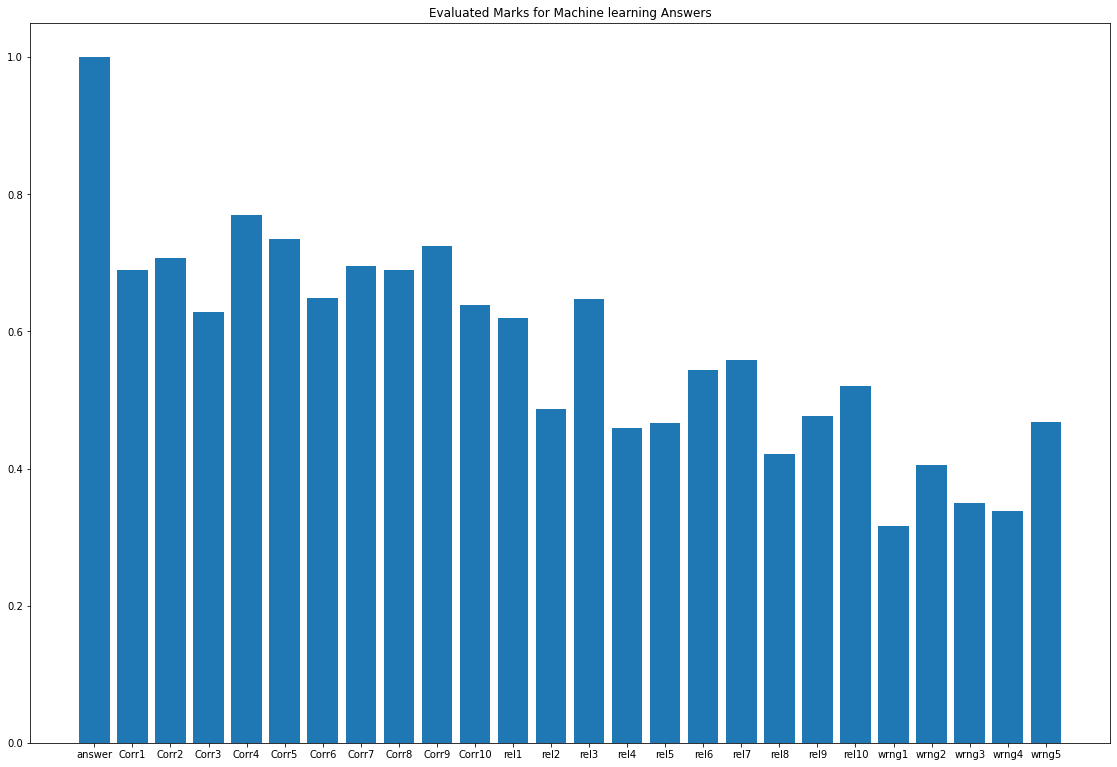

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,1,2.5,2.5])
ax.set_title('Evaluated Marks for Machine learning Answers')
answer = ['answer',
          'Corr1', 'Corr2', 'Corr3', 'Corr4', 'Corr5','Corr6', 'Corr7', 'Corr8', 'Corr9', 'Corr10',
          'rel1', 'rel2', 'rel3', 'rel4', 'rel5','rel6', 'rel7', 'rel8', 'rel9', 'rel10',
          'wrng1', 'wrng2', 'wrng3', 'wrng4', 'wrng5'

          ]
scores = final_score_ml
ax.bar(answer,scores)
plt.show()

In [82]:
final_score_java = (0.2 * (np.array(skill_score_java)/100)) + (0.8 * np.array(bert_score_java))
final_score_java

array([1.00000001, 0.57800006, 0.54000003, 0.72880003, 0.65400003,
       0.73920003, 0.71840004, 0.62560002, 0.77480005, 0.7084    ,
       0.57440001, 0.5324    , 0.4752    , 0.55319999, 0.60720003,
       0.65600002, 0.64880002, 0.66000003, 0.59759998, 0.4664    ,
       0.52080005, 0.27360001, 0.35440001, 0.28480002, 0.20320001,
       0.36240003])

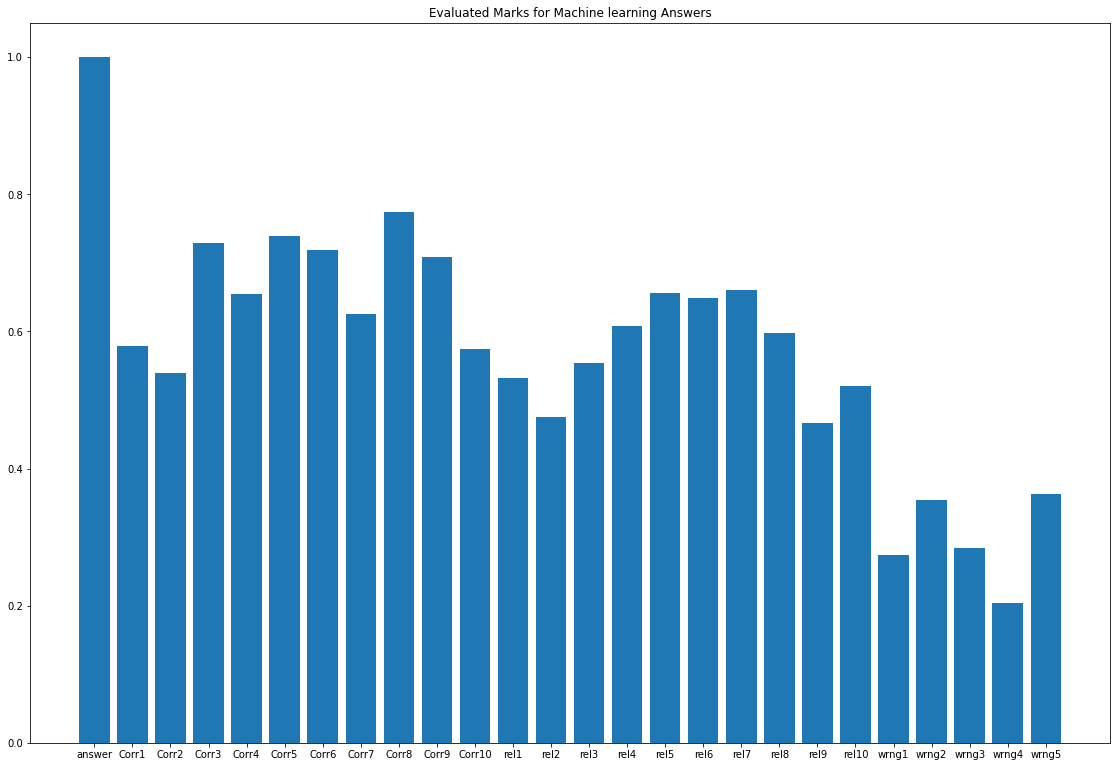

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,1,2.5,2.5])
ax.set_title('Evaluated Marks for Machine learning Answers')
answer = ['answer',
          'Corr1', 'Corr2', 'Corr3', 'Corr4', 'Corr5','Corr6', 'Corr7', 'Corr8', 'Corr9', 'Corr10',
          'rel1', 'rel2', 'rel3', 'rel4', 'rel5','rel6', 'rel7', 'rel8', 'rel9', 'rel10',
          'wrng1', 'wrng2', 'wrng3', 'wrng4', 'wrng5'

          ]
scores = final_score_java
ax.bar(answer,scores)
plt.show()